# Machine Learning with Python - Model Validation and Selection

## Introduction

In the previous rounds you have implemented machine learning (ML) methods by combining particular choices for

* data points, their features and labels, 
* a hypothesis space (of predictor functions) 
* and a loss function that measures the quality of a particular predictor function out of the hypothesis space. 

ML algorithms are optimization methods that try to find (or learn) the best predictor out of the hypothesis space by minimizing the average loss (training error) over some labeled data points (the training data).

The code snippet below read in some data points $(x^{(i)},y^{(i)})$, for $i=1,2,\ldots$, which are characterized by a scalar feature $x^{(i)}$ and a numeric label $y^{(i)}$. 

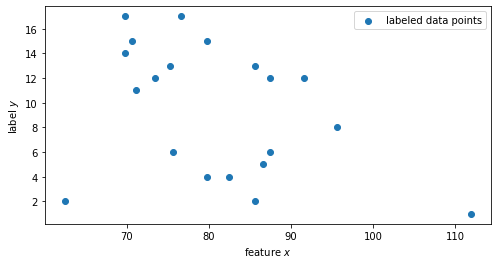

total number of labeled data points =  20


In [8]:
# Load the dataset and store data and labels in variables
from sklearn import datasets # import datasets fomr sklearn
# the library matplotlib.pyplot provides functions for plotting data 
import matplotlib.pyplot as plt      # import library matplotlib.pyplot as plt
# the package "PolynomialFeatures" allows to transform a single scalar feature x 
# into several features given by the powers x^{0},x^{1},x^{2}, ... 
from sklearn.preprocessing import PolynomialFeatures
# package "LinearRegression" provides methods to fit a linear predictor to 
# given data points (training data)
from sklearn.linear_model import LinearRegression

import numpy as np 

# load the toy dataset "linnerud" provide by the "sklearn" package
linnerud = datasets.load_linnerud()
# read in the exercise parameters (nr. of chinups ..) for each athlete
Exercise = linnerud['data']
# read in the physiological (weight ...) paramters for each athlete
Physio = linnerud['target']

x = Physio[:,0] 
# convert Lbs to Kg
x = x*0.453 
# we use number of chinups as label and store them (for all athletes) in numpy array y
y = Exercise[:,0] 

fig1, axes1 = plt.subplots(1, 1, figsize=(8, 4))
axes1.scatter(x, y,label="labeled data points")
axes1.set_ylabel('label ' + r'$y$')
axes1.set_xlabel('feature ' + r'$x$')
plt.legend()
plt.show()

m_total = y.shape[0] 
print ("total number of labeled data points = ", m_total)

Let us try to find a good predictor for the label $y$ of a data point using a polynomial $h(x)=w_{1}+w_{2}x+w_{3}x^{2}+\ldots+w_{r+1}x^{r}$ with some fixed maximum degree $r$ (e.g., $r=4$). The maximum degree $r$ is a measure for the complexity of the hypothesis space given by all polynomials of maximum degree $r$.
The larger we choose $r$, the more complex is resulting hypothesis space. In order to find a good predictor we tune the weights $w_{0},w_{1},\ldots$ to make the average prediction error on a training set as small as possible. Let us pick three data points for the training set. 

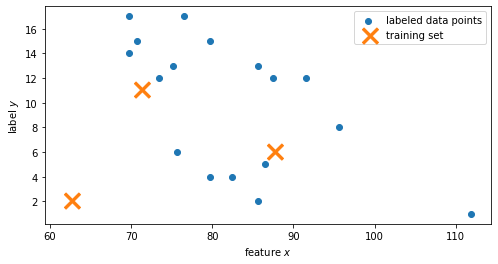

In [9]:
# we use some datapoints as the training set 

fig2, axes2 = plt.subplots(1, 1, figsize=(8, 4))


# choose three indices of data points that will be used 
# as training set 
training_set = [m_total-1,m_total-3,m_total-6]
# create a dummy numpy array "dmy" which will be used to 
# select data points in the training set and those outside the training set 
dmy = np.zeros((m_total,1)) 
# set entries corresponding to training data to 10 
dmy[training_set] = 10 

x=x.reshape(-1,1)
y=y.reshape(-1,1)

# choose all data points for which the correpsonding entry of 
# the numpy array "dmy" is larger than 5
x_train = x[dmy>5]
y_train = y[dmy>5]
# choose data points for which corresponding entry of numpy 
# array "dmy" is smaller than 5 (these are indices that are not in training set)
x_val = x[dmy<5]
y_val = y[dmy<5]
# plot labeled data points which are not in training set
axes2.scatter(x_val, y_val,label="labeled data points")
# plot labeled data points which are in the training set 
axes2.scatter(x_train, y_train, s=400,marker=r'$\times$', label="training set")

axes2.set_ylabel('label ' + r'$y$')
axes2.set_xlabel('feature ' + r'$x$')

plt.legend(loc='upper right')
plt.show()

Using three data points (marked by crosses in the above plot) as a training set, we learn (find) the best predictor out the hypothesis space 

$$ \mathcal{H} = \{ h(x) = w_{0}+w_{1}x+w_{2}x^2+w_{3}x^3+w_{4}x^{4} \mbox{ with tunable weights } w_{0},\ldots,w_{4} \in \mathbb{R} \}.$$

The code snippet below uses the Python library 'scikit-learn' to find weights $w_{0},\ldots,w_{4}$ such that the average sqaured prediction error $\big(h\big(x^{(i)}\big) - y^{(i)}\big)^{2}$ on the three training data points is minimal. We denote the predictor obtained by these optimal weights as $h^{(\rm opt)}(x)$. 

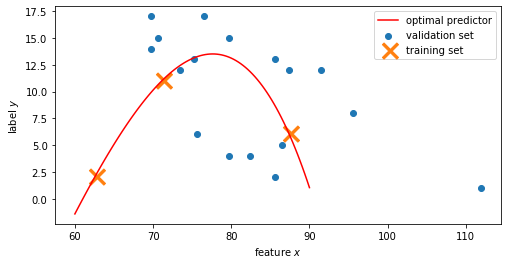

In [10]:
fig3, axes3 = plt.subplots(1, 1, figsize=(8, 4))
axes3.scatter(x_val, y_val,label="validation set")

training_set = [m_total-1,m_total-3,m_total-6]
x_train = x[training_set]
y_train = y[training_set]
axes3.scatter(x_train, y_train, s=400,marker=r'$\times$', label="training set")

axes3.set_ylabel('label ' + r'$y$')
axes3.set_xlabel('feature ' + r'$x$')

# choose best predictor out of the hypothesis space given by all 
# polynomials h(x) = w_1 + w_2*x ... + w5*x^4 of maximum degree 4 

poly = PolynomialFeatures(degree = 4) 
# transform scalar feature x to a feature vector [x^0 x^1 ... x^4]
X_poly = poly.fit_transform(x_train.reshape(-1,1)) 
# we can now use linear regression using the transformed feature vectors 
lin2 = LinearRegression() 
# compute optimal weights to minimize training error 
lin2.fit(X_poly, y_train) 

# plot the resulting "optimal" predictor (having minimum training error) 

grid_of_x_vals = np.linspace(60, 90, num=100)
X_poly_grid = poly.fit_transform(grid_of_x_vals.reshape(-1,1)) 
axes3.plot(grid_of_x_vals, lin2.predict(X_poly_grid), color = 'red',label="optimal predictor")

plt.legend(loc='upper right')
plt.show()

The above figure shows that the learnt predictor $h^{(\rm opt)}(x)$ (the red curve) almost perfectly fits the training data (organge crosses). The average loss of $h^{(\rm opt)}(x)$ incurred on the three training data points is essentially zero. However, according to the above figure, the predictor $h^{(\rm opt)}(x)$ incurs a rather large prediction error on the data points (blue dots) which are not used for training (orange crosses). 

The key idea of validation is to try out a predictor, which has been found by minimizing its training error, on different data points which are not part of the training data. In the above figure, we can use the prediction error incurred for the data points marked by blue dots to validate the predictor $h^{(\rm opt)}$. 

## Learning goals


In this round you will learn a simple but powerful approach for choosing a "good" hypothesis space out of a set of alternatives. In particular, you will 

* learn that the training error is a poor quality measure for a hypothesis space 
* learn that the validation error is a more useful quality measure for a hypothesis space 
* learn how to choose between different hypothesis spaces (models) using the validation error
* learn about regularization as a soft variant of model selection. 

## Background Material 

* [Video lecture](https://www.youtube.com/watch?v=MyBSkmUeIEs) of Prof. Andrew Ng on model validation and selection
* [Short video](https://www.youtube.com/watch?v=TIgfjmp-4BA) on K-Fold Cross validation from Udacity
* [Video lecture](https://www.youtube.com/watch?v=KvtGD37Rm5I) of Prof. Andrew Ng on regularization
* Chapter 2; Chapter 6; Chapter 7 of this [tutorial](https://arxiv.org/abs/1805.05052)  


## What is model validation?

Assume we want to predict a numeric label (quantitiy of interest) $y \in \mathbb{R}$ based on some features $\mathbf{x}=(x_{1},\ldots,x_{n}) \in \mathbb{R}^{n}$ of a data point. In order to learn a good predictor $h(\mathbf{x}$, we can use some data points $\mathbb{X} = \{ \big( \mathbf{x}^{(i)},y^{(i)}\big)\}$ for which we have determined the true label value $y^{(i)}$. Each data point in the training data $\mathbb{X}$ is characterized by features $\mathbf{x}^{(i)}$ and a label (quantity of interest) $y^{(i)}$. 

Consider a predictor $h(\mathbf{x})$ which works extremely well on the dataset $\mathbb{X}$,
\begin{equation}
\sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}}\big(y^{(i)} - \underbrace{h(\mathbf{x}^{(i)})}_{= \hat{y}^{(i)}}\big)^{2}\approx 0.
\end{equation}

Even if the predictor $h(\mathbf{x})$ does exceptionally well on the data set $\mathbb{X}$, we can not be sure that the method will work well on new data points (different from the data points in $\mathbb{X}$). 
This is particularly true for ML methods that allow for highly complicated predictor functions $h(\mathbf{x})$. Examples of highly complicated predictor functions are linear functions $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x} = \sum_{r=1}^{n} x_{r} w_{r}$ using a large number of features $x_{1},\ldots,x_{n}$ (the number $n$ of features is a measure of the complexity of the space of linear functions). It can be shown that if the number of features linear predictors on data points with $n$ features allows to perfectly fit any set of $m$ labels $y^{(i)}$ whenever $m \leq n$. 

Another example for a vast hypothesis space is given by the set of all predictor functions that can be represented by a given deep neural network structure with billions of adjustable weights (each edge has one weight $w$ that can be tuned). When using an extremely large hypothesis space $\mathcal{H}$, it is very likely that just by chance one finds a predictor function $h(\cdot) \in \mathcal{H}$ that perfectly fits (reproduces) a given set of labeled data points (unless this dataset is VERY large). 

ML methods that perform well on training data due to memorization of the training data do not pick up any intrinsic relation between features $\mathbf{x}$ and label $y$. Such an ML method merely overfits the training data and will not be able to **generalize well** to new data. 

In order to detect overfitting we need to implement some form of **validation**. The idea behind validation is quite simple: 

**Split the available labeled data points $\mathbb{X}$ into two different subsets, a training set $\mathbb{X}^{(t)}$ of size $m_{t}$ and a validation set $\mathbb{X}^{(v)}$ of size $m_{v}$.** 

<img src="../../../coursedata/R4_ModelValSel/SplitValTrain.jpg" alt="Drawing" style="width: 600px;"/>

<a id='splitTestandValidationfunction'></a>
<div class=" alert alert-info">
<b>Demo.</b> Split Data into Training and Validation Set.

The code snippet below creates a synthetic dataset of $m$ datapoints $(\mathbf{x}^{(i)},y^{(i)})$. Each data point is characterized by the feature vector $\mathbf{x}^{(i)}=\big(x^{(i)}_{1},\ldots,x_{n}^{(i)}\big)^{T} \in \mathbb{R}^{n}$ and a numeric label $y^{(i)} \in \mathbb{R}$. The feature vectors are stored in the rows of the matrix $\mathbf{X}\in \mathbb{R}^{m \times n}$. The labels are collected into the vector $\mathbf{y}=\big(y^{(1)},\ldots,y^{(m)}\big)^{T} \in \mathbb{R}^{m}$. 

The Python library `scikit-learn` provides the function 

`X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=2)` 

which can be used to split a dataset into training and validation set. The function reads in the feature vectors in the numpy array `X` of shape ($m,n$) and the labels in the numpy array `y` of shape ($m,1$). 

The function returns numpy arrays `X_train` of shape ($m_{t},n$), `X_val`of shape ($m_{v},n$), `y_train` of shape ($m_{t},1$) and `y_val` of shape ($m_{v},1$). The input parameter `test_size` specifies the relative size $m_{v}/m$ of the validation set. When using `test_size=0.2`, $20 \%$ of the original data points are used for the validation set and the and the remaining $80 \%$ in the training set.

[Scikit-learn documentation of train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
</div>

d:\Users\Alexander\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


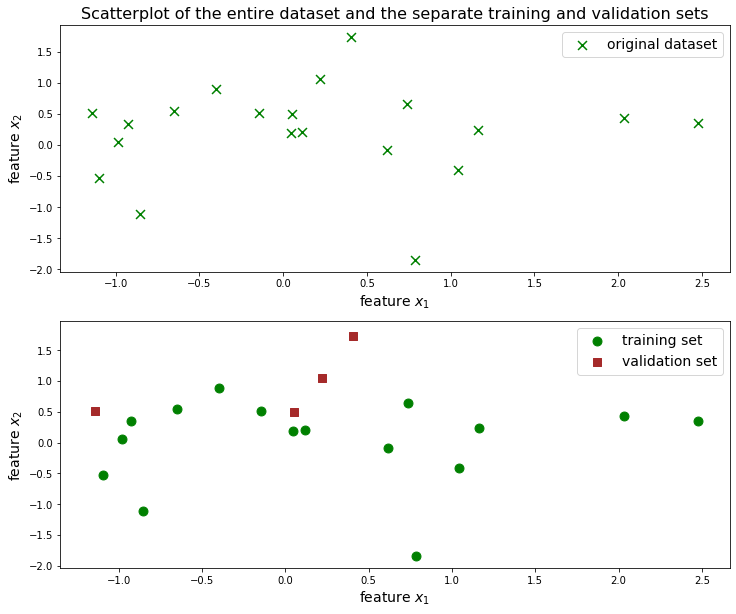

In [11]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split    # Import train_test_split function
from sklearn import metrics

m = 20    # Number of data points
n = 10    # Number of features

np.random.seed(4)    # Set random seed for reproducability

X = np.random.randn(m,n)    # create feature vectors using random numbers
y = np.random.randn(m,1)    # create labels using random numbers 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)  # Split dataset with 80% training and 20% test

plt.rc('legend', fontsize=14)    #  Set font size for legends
plt.rc('axes', labelsize=14)    #  Set font size for axis labels

fig, axes = plt.subplots(2, 1, figsize=(12,10))    # Create figure with two subplots
axes[0].set_title('Scatterplot of the entire dataset and the separate training and validation sets', fontsize=16)

axes[0].scatter(X[:, 0], X[:, 1], c='g',marker ='x', s=80, label='original dataset')  # Scatter plot of the original dataset
axes[0].legend(loc='best')    # Set legend and set it in the best (automatically determined) position
axes[0].set_xlabel(r'feature $x_1$')    # Set the label of the x-axis
axes[0].set_ylabel(r'feature $x_2$')    # Set the label of the y-axis

axes[1].scatter(X_train[:, 0], X_train[:, 1], c='g',marker ='o', s=80, label='training set')  # Scatter plot of the training set
axes[1].scatter(X_val[:, 0], X_val[:, 1], c='brown',marker ='s', s=80, label='validation set')  # Scatter plot of the validation set
axes[1].legend(loc='best')    # Set legend and set it in the best (automatically determined) position
axes[1].set_xlabel(r'feature $x_1$')    # Set the label of the x-axis
axes[1].set_ylabel(r'feature $x_2$')    # Set the label of the y-axis

fig.show()

The training set $\mathbb{X}^{(t)}$ is used to learn the optimal predictor $h_{\rm opt} \in \mathcal{H}$ out of the hypothesis space: 
\begin{equation} 
h_{\rm opt}  = {\rm argmin}_{h \in \mathcal{H}} \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - \underbrace{h(\mathbf{x}^{(i)})}_{= \hat{y}^{(i)}}\big)^{2}. 
\end{equation} 
The minimum objective value of this optimization problem is the **training error** 
\begin{equation}
E_{\rm train} = (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h_{\rm opt}(\mathbf{x}^{(i)})\big)^{2}.
\end{equation} 
Note that the training error $E_{\rm train}$ measures the performance of the predictor $h_{\rm opt}$ on the same data points $\mathbb{X}^{(t)}$ which have been used to tune (learn) $h_{\rm opt}$. Therefore, the training error $E_{\rm train}$ is too **optimistic** as an estimate for the average error (or loss) of $h_{\rm opt}$ on new data points which are different from $\mathbb{X}^{(t)}$. 

To estimate the error incurred by $h_{\rm opt}$ on new data points, we calculate the average loss incurred by $h_{\rm opt}$ on the validation set $\mathbb{X}^{(v)}$. This yields the **validation error**
\begin{equation}
E_{\rm val} = (1/m_{v}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(v)}} \big(y^{(i)} - h_{\rm opt}(\mathbf{x}^{(i)})\big)^{2}. 
\end{equation}
The validation error $E_{\rm val}$ is a much better estimate for the average error (or loss) of the predictor $h_{\rm opt}$. 

The training error $E_{\rm train}$ provides a quality measure for the particular predictor $h_{\rm opt}$. In contrast, the validation error $E_{\rm val}$ provides a quality measure for the entire hypothesis space $\mathcal{H}$. Therefore, we can use the validation error for **model selection**. We choose the best hypothesis space $\mathcal{H}$ out of a set of alternative hypothesis spaces $\mathcal{H}^{(1)},\mathcal{H}^{(2)},\ldots$ according to the corresponding validation errors $E_{\rm val}(1),E_{\rm val}(2),\ldots$.

## The Problem 

Model validation and selection is best understood by working through a particular example. To this end, we revisit the problem of predicting the grayscale value $y$ of a pixel in an aerial photograph. In **Round 2 - Regression**, we have formalized the grayscale value prediction as an ML problem with

1. **data points** which represent pixels in the photograph. Each data point is characterized by features $\mathbf{x} = (x_{1},\ldots,x_{n}) \in \mathbb{R}^{n}$. Moreover, we define the grayscale value of the pixel as the label $y$ of the data point. 

2. a **hypothesis space** $\mathcal{H}$ consisting of predictor functions $h: \mathbb{R}^{n} \rightarrow \mathbb{R}$ from features $\mathbf{x} \in \mathbb{R}^{n}$ to a predicted price $\hat{y}=h(\mathbf{x})\in \mathbb{R}$ and 

3. a **loss function**, such as squared error loss, which measures the quality of a predictor.

<a id='handsondata'></a>
<div class=" alert alert-info">
<p><b>Demo.</b> Loading the Data.</p>
    
The following code snippet defines a function `X,y = GetFeaturesLabels(m,n)` which reads in the features and labels of pixels which are not corrupted (not fully black). The input parameters are the number `m` of data points and the number `n` of features to be used for each data point. The function returns a matrix $\mathbf{X}$ and vector $\mathbf{y}$. 

The features $\mathbf{x}^{(i)}$ of data points are stored in the rows of the numpy array `X` (of shape (m,n)) and the corresponding grayscale values $y^{(i)}$ in the numpy array `y` (of shape (m,1)). The two arrays represent the feature matrix $\mathbf{X} = \begin{pmatrix} \mathbf{x}^{(1)} & \ldots & \mathbf{x}^{(m)} \end{pmatrix}^{T}$ and the label vector $\mathbf{y} = \big( y^{(1)}, \ldots, y^{(m)} \big)^{T}$. 

</div>

In [12]:
# import "Pandas" library/package (and use shorthand "pd" for the package) 
# Pandas provides functions for loading (storing) data from (to) files
import pandas as pd  
#import cv2
from matplotlib import pyplot as plt 
from IPython.display import display, HTML
import numpy as np   
import random
from sklearn.preprocessing import StandardScaler

def GetFeaturesLabels(m=10, n=10):

    corrupted = '/coursedata/R2_Regression/SomePhotoCorrupted.bmp'    # File path of the aerial photo

    photo = cv2.imread(corrupted, 0)    # Load image in grayscale (flag=0)    
    photo = cv2.resize(photo, (100, 100))    # Resize image to 100x100
       
    img_width, img_height = photo.shape    # Get image width and height
    
    # define size of neighorhood which is used to characterize a pixel
    wp = 2
    hp = 2
    
    # determine "uncorroputed pixels" by finding those pixels with grayscale value larger than 0
    good_idx = np.where(photo > 0)
    
    # avoid pixels close to the boundary since we cannot find neighouring pixels for them 
    rows = np.clip(good_idx[0], wp, img_height - wp)
    cols = np.clip(good_idx[1], hp, img_width - hp)
    
    # the function cv2.imread() returns an array of grayscale values 0...255 stored as integers 
    # it will be convenient to convert the integers to floating point numbers 
    # this allows us to work with grayscale values as real numbers 
    photo = photo.astype(float)
    
    sample_size = rows.shape[0]
    
    # augment image in Data with stripes such that we can also define neighborhoods of border pixels 
    tmp = np.vstack((np.zeros((wp, img_width)), photo, np.zeros((wp, img_width))))
    augmented = np.hstack((np.zeros((2*wp + img_height, hp)), tmp, np.zeros((2*wp + img_height, hp))))

    # construct features X for and label vector y for training 
    x1 = np.zeros((sample_size, 1))
    y = np.zeros((sample_size, 1))
 
    for iter_datapoint in range(m): 
        row_tmp = rows[iter_datapoint] + wp
        col_tmp = cols[iter_datapoint] + hp
        # the feature of a data point (pixel) is the average gray level of the neighborhoud 
        x1[iter_datapoint] = np.sum(augmented[(row_tmp-wp):(row_tmp), (col_tmp-hp):(col_tmp + hp + 1)]) / (wp*(2*hp + 1))
        y[iter_datapoint] = augmented[row_tmp, col_tmp]

    x1 = x1[0:m]
    np.random.seed(30)    # Set random seed
    # lets add some "extra features" here 
    X = np.hstack((x1, np.random.randn(n,m).T)) 
    
    X = X[:,0:n] 
    y = y[0:m]
    
    return X, y

## Linear Predictors 

To predict the grayscale value $y$ of a pixel based on the first $r$ features (or characteristics) $\mathbf{x}=(x_{1},\ldots,x_{r})^{T} \in \mathbb{R}^{r}$, we try to find (or learn) a predictor function $h(\mathbf{x})$ such that $y \approx h(\mathbf{x})$. We restrict ourselves to linear predictor functions. Thus, we use the hypothesis space 

$$ \mathcal{H}^{(r)} = \{ h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x} \mbox{ with some weight } \mathbf{w}\in \mathbb{R}^{r} \}.$$ 

Carefully note that for each value $r\in \{1,\ldots,n\}$, we obtain a different hypothesis space $\mathcal{H}^{(r)}$ (or "model"). One can verify that these hypothesis spaces are nested in the sense of 
$$\mathcal{H}^{(1)} \subseteq \mathcal{H}^{(2)} \subseteq \mathcal{H}^{(3)} \ldots .$$

For a fixed model parameter $r$, the weight vector $\mathbf{w} \in \mathbb{R}^{r}$ is tuned by minimizing the average squared error loss incurred on the labeled data points in the training set $\mathbb{X}^{(t)}$: 
\begin{align}\min_{h \in \mathcal{H}^{(r)}}  & \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}}  (y^{(i)} - h(\mathbf{x}^{(i)}) )^{2} \nonumber \\ 
= \min_{\mathbf{w} \in \mathbb{R}^{r}} & \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}}  \big(y^{(i)} -  \mathbf{w}^{T}\mathbf{x}^{(i)}  \big)^{2}.
\end{align}
Solving this training problem provides us with optimal choices for weight vector $\mathbf{w}$. 
However, we have another design parameter at our disposal: the number $r$ of features! While in our data base each pixel is characterized by $n$ features, we are free to use fewer e.g. only the first $r \leq n$ of these features. 

What is the best choice for $r$? 

## The Wrong Way 

Let us try out each hypothesis space $\mathcal{H}^{(r)}$ on the training data $\mathbb{X}^{(t)}$. For each $r=1,\ldots,h,$ we learn the optimal predictor $h_{\rm opt}^{(r)} \in \mathcal{H}^{(r)}$ by minimizing the average loss on the training set: 
\begin{align} 
h_{\rm opt}^{(r)} & = {\rm argmin}_{h \in \mathcal{H}^{(r)}} (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big( y^{(i)}- h(\mathbf{x}^{(i)}) \big)^{2}. 
\end{align} 
The corresponding training error is     
\begin{align} 
E_{\rm train}(r) & = (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big( y^{(i)}- h_{\rm opt}^{(r)}(\mathbf{x}^{(i)}) \big)^{2} \nonumber \\ 
& = \min_{h \in \mathcal{H}^{(r)}} (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big( y^{(i)}- h(\mathbf{x}^{(i)}) \big)^{2} \nonumber \\ 
& = \min_{\mathbf{w} \in \mathbb{R}^{r}} (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big( y^{(i)}- \mathbf{w}^{T} \mathbf{x}^{(i)}  \big)^{2} \nonumber \\ 
& = \min_{\mathbf{w} \in \mathbb{R}^{r}} (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big( y^{(i)}- \sum_{s=1}^{r}w_{s} x_{s}^{(i)}  \big)^{2} 
\end{align} 
It is tempting to choose the number $r$ of features according to the smallest training error $E_{\rm train}(r)$. 

<a id='trainModel'></a>
<div class=" alert alert-info">
<p><b>Demo.</b> Varying Number of Features </p>
    
The following code snippet computes the training error E(r) for each choice for the number r of features. For each particular value $r=1,\ldots,n$, the best linear predictor $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$ is using the Python function `LinearRegression.fit()`

[Documentation of the LinearRegression class in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) 

</div>    

In [13]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

m = 10                        # we use the first m=20 data points (pixels) from the aerial photo 
n = 10                        # maximum number of features used 

X,y = GetFeaturesLabels(m,n)  # read in m data points using n features 
linreg_error = np.zeros(n)    # vector for storing the training error of LinearRegresion.fit() for each r

for r_minus_1 in range(n):    # loop over number of features r (minus 1)
    reg = LinearRegression(fit_intercept=False)    # create an object for linear predictors
    reg = reg.fit(X[:,:(r_minus_1 + 1)], y)    # find best linear predictor (minimize training error)
    pred = reg.predict(X[:,:(r_minus_1 + 1)])    # compute predictions of best predictors 
    linreg_error[r_minus_1] = mean_squared_error(y, pred)    # compute training error 

plot_x = np.linspace(1, n, n, endpoint=True)    # plot_x contains grid points for x-axis (1,...,n)

# Plot training error E(r) as a function of feature number r
plt.rc('legend', fontsize=14)    #  Set font size for legends
plt.rc('axes', labelsize=14)    #  Set font size for axis labels
plt.figure(figsize=(10,6))    # Set figure size
plt.plot(plot_x, linreg_error, label='$E(r)$', color='red')
plt.xlabel('# of features $r$')
plt.ylabel('training error $E(r)$')
plt.title('training error vs number of features', fontsize=16)
plt.legend()
plt.show()

NameError: name 'cv2' is not defined

### Let's Interpret the Results!

Based on the above plot, we could argue that we should choose the linear model with $r=10$ features since this yields the lowest training error $E(r)$. **This reasoning is incorrect** since our ultimate goal is to find a predictor for new pixels for which we do not know the grayscale values (e.g. corrupted pixels). Our goal is not to accurately reproduce the grayscale values of pixels for which we already know these values! 

Using the training error $E_{\rm train}(r)$ to assess the quality of the predictor $h_{\rm opt}^{(r)}$ is misleading since $h_{\rm opt}^{(r)}$ is based on the weight vector $\mathbf{w}$ and intercept that is perfectly tuned to the training data $\mathbb{X}^{(t)}$. Also, the more features (larger $r$) we use, the better we will be able to fit the training data $\mathbb{X}^{(t)}$ (obtain smaller training error). However, this does not necessarily lead to better performance on new data. A complex model with too many features (large $r$) might only fit the training data very well, and generalize poorly to new data.

Consider the case of $r=m_{\rm train}$, i.e., the number of features is the same as the number of labeled data points in the training set. Under very mild conditions it can be shown that in this case there always exists a linear predictor $h(\mathbf{x})=\mathbf{w}^{T} \mathbf{x}$ such that $y^{(i)} = h(\mathbf{x}^{(i)})$, i.e., the training error is exactly zero (see Chapter 7.1 of the coursebook)! 
A better way to evaluate the quality of a predictor is presented next.

##  The Right Way

The training error $E_{\rm train}(r)$ is a bad measure for the quality of a hypothesis space $\mathcal{H}^{(r)}$ since it will always favor larger spaces (larger number $r$ of features). A more useful measure for the quality of a hypothesis space $\mathcal{H}^{(r)}$ is the validation error 
\begin{equation}
E_{\rm val}(r) = (1/m_{v}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(v)}} \big(y^{(i)} - h^{(r)}_{\rm opt}(\mathbf{x}^{(i)})\big)^{2}. 
\end{equation} 
Here, the predictor $h_{\rm opt}$ is obtained by minimizing the training error over all linear predictors using $r$ features: 
\begin{equation}
 h^{(r)}_{\rm opt} = {\rm argmin}_{h \in \mathcal{H}^{(r)}} (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)})\big)^{2}.
\end{equation}
Since each predictor function $h \in \mathcal{H}^{(r)}$ is given by $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$ we can find the optimal predictor via the optimum weight and intercept 
\begin{equation}
\mathbf{w}_{\rm opt} = {\rm argmin}_{\mathbf{w}\in \mathbb{R}^{r}} (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - \mathbf{w}^{T} \mathbf{x}^{(i)} \big)^{2}. 
\end{equation} 

<a id='splitTestandValidationfunction'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Generate Training and Validation Set.
   
Use the `scikit-learn` library function `train_test_split()` to split the data points obtained from the function `GetFeaturesLabels` into a training and validation set. The function should be used with the choice `random_state=2` and `test_size=0.2`. 
</div>

In [ ]:
from sklearn.model_selection import train_test_split    # Import train_test_split function

m = 20                        # we use the first m=20 data points (pixels) from the aerial photo
n = 10                        # maximum number of features used 

X, y = GetFeaturesLabels(m,n)    # read in m data points using n features 

### STUDENT TASK ###
# Compute the training and validation sets
# X_train, X_val, y_train, y_val = ...
### BEGIN SOLUTION
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)  # 80% training and 20% test
### END SOLUTION

In [ ]:
# Check dimensions of train and validation vectors
assert len(X_train) == 16, "The 'x_train' vector has the wrong length"
assert len(y_train) == 16, "The 'y_train' vector has the wrong length"
assert len(X_val) == 4,   "The 'x_val' vector has the wrong length"
assert len(y_val) == 4, "The 'y_val' vector has the wrong length"
print('Sanity checks passed!')

<a id='trainValErrorsfunction'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Compute Training and Validation Error. 

**(1)** Complete the function `get_train_val_errors(X_train, X_val, y_train, y_val, n_features)` that returns the training error and validation error for each choice of $r=1,\ldots,n$. Please use `fit_intercept=True` The training errors should be stored in a numpy array `err_train` of shape (n,1) and the validation errors should be stored in the numpy array `err_val` of shape (n,1). The first entries of `err_train` and `err_val` should be $E_{\rm train}(1)$ and $E_{\rm val}(1)$. 

**(2)** Complete the function `get_best_model(err_val)`, that takes as input the validation errors `err_val` for each number of features $r=1,\ldots,n$ and returns the optimum number $\hat{r}$ of features (such that the validation error is smallest). 

Hint: you can determine the index of the smallest entry in a numpy array using `np.argmin()` ([see documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.argmin.html)).

**IMPORTANT!**: Remember that indexing for numpy arrays starts with index 0. However, we start with model size $r=1$. Thus, you need to add 1 to the index that you get by using `np.argmin()`.
</div>

In [ ]:
def get_train_val_errors(X_train, X_val, y_train, y_val, n_features):  
    err_train = np.zeros((n,1))    # Array for storing training errors
    err_val = np.zeros((n,1))    # Array for storing validation errors
    
    for r_minus_1 in range(n):    # Loop over the number of features r (minus one)
        ### STUDENT TASK ###
        ### BEGIN SOLUTION
        lin_reg = LinearRegression(fit_intercept=True)
        lin_reg = lin_reg.fit(X_train[:,:(r_minus_1+1)], y_train)
        w_opt = lin_reg.coef_
        y_pred_train = lin_reg.predict(X_train[:,:(r_minus_1+1)])
        err_train[r_minus_1] = mean_squared_error(y_train, y_pred_train)
        y_pred_val = lin_reg.predict(X_val[:,:(r_minus_1+1)])
        err_val[r_minus_1] = mean_squared_error(y_val, y_pred_val)
        ### END SOLUTION
    return err_train, err_val

def get_best_model(err_val):
    # best_model = ...
    ### BEGIN SOLUTION
    best_model = np.argmin(err_val) + 1
    ### END SOLUTION
    return best_model

In [ ]:
# Calculate training and validation errors using ´get_train_val_errors´
err_train, err_val = get_train_val_errors(X_train, X_val, y_train, y_val, n)

# Perform some sanity checks on the results
assert err_train.shape == (n,1), "numpy array err_train has wrong shape"
assert err_val.shape == (n,1), "numpy array err_val has wrong shape"
print('Sanity checks passed!')

### BEGIN HIDDEN TESTS
def test_get_train_val_errors(X_train, X_val, y_train, y_val, n_features):  
    err_train = np.zeros([n,1]) # Array for storing training errors
    err_val = np.zeros([n,1]) # Array for storing validation errors
    
    for r_minus_1 in range(n):
        lin_reg = LinearRegression(fit_intercept=True)
        lin_reg = lin_reg.fit(X_train[:,:(r_minus_1+1)], y_train)
        w_opt = lin_reg.coef_
        y_pred_train = lin_reg.predict(X_train[:,:(r_minus_1+1)])
        err_train[r_minus_1] = mean_squared_error(y_train, y_pred_train)
        y_pred_val = lin_reg.predict(X_val[:,:(r_minus_1+1)])
        err_val[r_minus_1] = mean_squared_error(y_val, y_pred_val)
    return err_train, err_val

t_err_train, t_err_val = test_get_train_val_errors(X_train, X_val, y_train, y_val, n)

np.testing.assert_allclose(t_err_train.reshape(-1,1), err_train.reshape(-1,1), atol=1e-3, err_msg='get_train_val_errors is not correctly calculating the training errors')
np.testing.assert_allclose(t_err_val.reshape(-1,1), err_val.reshape(-1,1), atol=1e-3, err_msg='get_train_val_errors is not correctly calculating the validation errors')
### END HIDDEN TESTS

In [ ]:
# Get the best model using `get_best_model`
best_model = get_best_model(err_val)

# Print the best model
print('The best model is obtained for r={}'.format(best_model))

# Perform some sanity checks on the result
assert best_model != None, "Please choose a value between 1 and n "
assert best_model <= n, "The values should be less than n"
assert best_model > 0, "The values should be more than 0"
print('Sanity checks passed!')

### BEGIN HIDDEN TESTS

def test_get_train_val_errors(X_train, X_val, y_train, y_val, n_features):  
    err_train = np.zeros([n,1]) # Array for storing training errors
    err_val = np.zeros([n,1]) # Array for storing validation errors
    
    for r_minus_1 in range(n):
        lin_reg = LinearRegression(fit_intercept=True)
        lin_reg = lin_reg.fit(X_train[:,:(r_minus_1+1)], y_train)
        w_opt = lin_reg.coef_
        y_pred_train = lin_reg.predict(X_train[:,:(r_minus_1+1)])
        err_train[r_minus_1] = mean_squared_error(y_train, y_pred_train)
        y_pred_val = lin_reg.predict(X_val[:,:(r_minus_1+1)])
        err_val[r_minus_1] = mean_squared_error(y_val, y_pred_val)
    return err_train, err_val

t_err_train, t_err_val = test_get_train_val_errors(X_train, X_val, y_train, y_val, n)
t_best_model = np.argmin(t_err_val) + 1

assert best_model == t_best_model
### END HIDDEN TESTS

Next, we plot the training and validation errors from the previous task:

In [ ]:
# Plot the training and validation errors for the different number of features r
plt.figure(figsize=(10,6))
plt.plot(range(1, n + 1), err_train, color='black', label=r'$E_{\rm train}(r)$', marker='o')  # Plot training error
plt.plot(range(1, n + 1), err_val, color='red', label=r'$E_{\rm val}(r)$', marker='x')  # Plot validation error

plt.title('Training and validation error for different number of features', fontsize=16)    # Set title
plt.ylabel('Empirical error')    # Set label for y-axis
plt.xlabel('r features')    # Set label for x-axis
plt.xticks(range(1, n + 1))  # Set the tick labels on the x-axis to be 1,...,n
plt.legend()
plt.show()

We see that the training error is monotonically decreasing with increasing number $r$ of features used in the linear predictor $h(\mathbf{x}) = w_{1}x_{1}+\ldots+w_{r}x_{r}$. However, the validation error is first decreasing but then significantly increasing for larger values of $r$. Note that the validation error is an estimate for the prediction error on new data points. For large values of $r$, the training error can be highly misleading as a measure for prediction error on new data.

## K-fold Cross-Validation

In general, there is no unique optimal way of splitting a data set into a training and validation set. The precise choice of how to divide data points into the training and validation set and also their relative size (80/20, 50/50 ...) has to be considered case-by-case for the application at hand. 

To get more guidance on how to split the data, one typically needs to have additional knowledge about the statistical properties of the data generating process. An accurate probabilistic model for the data points allows determining optimal split ratios between the training and validation set. That said, probabilistic (generative) models for the observed data points is beyond the scope of this course. 

Using only a single split of the data into training and validation set bears the risk of being extremely "unlucky". The single split might result in a highly non-typical validation set such that the validation error is not reliable as a measure for the average loss on new data. $K$-fold cross-validation is a straightforward extension of the "single-split approach" making it more robust. 

$K$-fold cross-validation randomly splits the data into $K$ equal-sized subsets ("folds"). It then executes $K$ rounds, each round corresponding to one of the $K$ folds. In the $k$th round, the $k$th fold is used as the validation set and the remaining $K-1$ folds are used as the training set. The validation errors obtained during each fold are then averaged to obtain the final validation error. 

As an example, a diagram of  5-fold cross-validation is depicted below. For each round, the fold which is used as the validation set is indicated by "test". 

![Components](../../../coursedata/R4_ModelValSel/cross_validation_diagram.png)

<a id='kfold'></a>
<div class=" alert alert-info">
<p><b>Student task.</b> Splitting data into K-folds in sklearn.</p>
    
The code snippet below shows how to use a `KFold` object in scikit-learn to iterate through `K` train/validation splits of the dataset `X`.
    
On initialization the `KFold` object is given the number of folds `K` as an argument. The Python [generator function](https://docs.python.org/3.8/glossary.html#term-generator) `KFold.split(X)` can then be used to iterate through the pairs of training and validation indices. 

For an array `idx` of indices, the data points in X corresponding to these indices can be obtained by `X[idx,:]`. We can use this to obtain the training and validation sets given the indices of the datapoints in the respective sets.

For more information, see the scikit-learn [documentation of KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).
</div>  

In [ ]:
# Import KFold class from scikitlearn library
from sklearn.model_selection import KFold

K=5    # Specify the number of folds of split data into
kf = KFold(n_splits=K, shuffle=False)    # Create a KFold object with 'K' splits

# For all splits, print the validation and training indices
iteration = 0
for train_indices, test_indices in kf.split(X):
    iteration += 1
    X_train = X[train_indices,:]    # Get the training set    
    X_val = X[test_indices,:]    # Get the validation set
    print('Iteration {}:'.format(iteration))
    print('Indices for validation set:', test_indices)
    print('Indices for training set:', train_indices)
    print('X_val shape: {}, X_train shape: {} \n'.format(X_val.shape, X_train.shape))

<a id='kfold'></a>
<div class=" alert alert-warning">
<p><b>Student task.</b> K-Fold Cross Validation.</p>
    
Your task is to fill in the missing parts of the code section below, in which the average training and validation errors of a linear model (with features $x_1,x_2$) is calculated using K-fold cross-validation, for different numbers `K` of folds.
    
For each `K` in `K_list`, the code should:

1. Create a `KFold` object using `K` folds (using `shuffle=False` as in the demo)
    
2. Iterate over the `K` pairs of train and test indices, and calculate and store the training and validation errors of the linear model for each split in `train_errors_per_cv_iteration` and `test_errors_per_cv_iteration` respectively
    
3. Calculate the average training- and validation error and append these to `err_train_folds` and `err_val_folds`



For more information, see the scikit-learn [documentation of KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).
    

</div>  

In [ ]:
m = 600    # we use the first m=600 data points (pixels) from the aerial photo
n = 2    # number of features used 

X,y = GetFeaturesLabels(m,n)  # read in m data points with n features 

K_list = list(range(2,11))   # List of K:s to use (2,...,10)
err_train_folds = []  # List to store the average training error over K folds for each K in K_list
err_val_folds = []  # List to store the average validation error over K folds for each K in K_list

# Loop over all values of K in K_list
for K in K_list:

    train_errors_per_cv_iteration = []    # List to store the training errors of the 'K' train/test splits (for current K)
    test_errors_per_cv_iteration = []    # List to store the test errors of the 'K' train/test splits (for current K)
    
    ### STUDENT TASK ###
    ### BEGIN SOLUTION
    kf = KFold(n_splits=K, shuffle=False)    # Create a KFold object with 'K' splits

    # Iterate over the 'K' different train/test splits in kf   
    for train_indices, test_indices in kf.split(X):
        reg = LinearRegression(fit_intercept=False)    # Create new linear regression model
        reg = reg.fit(X[train_indices,:], y[train_indices])    # Fit the model on the current training set
        y_pred_train = reg.predict(X[train_indices,:])    # Calculate the predicted labels of the current training set
        train_errors_per_cv_iteration.append(mean_squared_error(y[train_indices], y_pred_train))    # Add the training error to list of errors
        y_pred_val = reg.predict(X[test_indices,:])    # Calculate the predicted labels of the current test set
        test_errors_per_cv_iteration.append(mean_squared_error(y[test_indices], y_pred_val))    # Add the test error to list of errors
            
    err_train = np.mean(train_errors_per_cv_iteration)    # compute the mean of round-wise training errors
    err_val = np.mean(test_errors_per_cv_iteration)    # compute the mean of round-wise validation errors
    err_train_folds.append(err_train)
    err_val_folds.append(err_val)
    ### END SOLUTION
    
print('Training errors for each K:')
print(err_train_folds, '\n')
print('Validation error for each K:')
print(err_val_folds, '\n')

In [ ]:
# Perform some sanity checks on the result
assert len(err_train_folds) == len(K_list), "err_train_folds is of the wrong length!"
assert len(err_val_folds) == len(K_list), "err_val_folds is of the wrong length!"
assert (err_val_folds[0] - err_train_folds[0]) > (err_val_folds[8] - err_train_folds[8])
print('Sanity checks passed!')

### BEGIN HIDDEN TESTS

def t_kfold():
    K_list = list(range(2,11))   # List of K:s to use (2,...,10)
    err_train_folds = []  # List to store the average training error over K folds for each K in K_list
    err_val_folds = []  # List to store the average validation error over K folds for each K in K_list

    # Loop over all candidate values of K
    for K in K_list:

        train_errors_per_cv_iteration = []    # List to store the training errors of the 'K' train/test splits (for current K)
        test_errors_per_cv_iteration = []    # List to store the test errors of the 'K' train/test splits (for current K)

        kf = KFold(n_splits=K, shuffle=False)    # Create a KFold object with 'K' splits

        # Iterate over the 'K' different train/test splits in kf   
        for train_indices, test_indices in kf.split(X):
            reg = LinearRegression(fit_intercept=True)    # Create new linear regression model
            reg = reg.fit(X[train_indices,:], y[train_indices])    # Fit the model on the current training set
            y_pred_train = reg.predict(X[train_indices,:])    # Calculate the predicted labels of the current training set
            train_errors_per_cv_iteration.append(mean_squared_error(y[train_indices], y_pred_train))    # Add the training error to list of errors
            y_pred_val = reg.predict(X[test_indices,:])    # Calculate the predicted labels of the current test set
            test_errors_per_cv_iteration.append(mean_squared_error(y[test_indices], y_pred_val))    # Add the test error to list of errors

        err_train = np.mean(train_errors_per_cv_iteration)    # compute the mean of round-wise training errors
        err_val = np.mean(test_errors_per_cv_iteration)    # compute the mean of round-wise validation errors
        err_train_folds.append(err_train)
        err_val_folds.append(err_val)
        
    return err_train_folds, err_val_folds

t_err_train_folds, t_err_val_folds = t_kfold()
np.testing.assert_allclose(t_err_train_folds, err_train_folds, atol=1e-3, err_msg="The training errors for different values of K are incorrect")
np.testing.assert_allclose(t_err_val_folds, err_val_folds, atol=1e-3, err_msg="The validation errors for different values of K are incorrect")
### END HIDDEN TESTS 

In [ ]:
# Plot the training and validation errors as a function of the number K of folds
plt.figure(figsize=(8,6))
plt.plot(K_list, err_train_folds)
plt.plot(K_list, err_val_folds)
plt.xlabel('K folds')
plt.ylabel("Error"
          )
plt.title("Average training and validation errors vs. number of folds")
plt.legend(['Training error', 'Validation error'])
plt.show()

If the student task has been solved correctly, the figure above should show a trend of increasing training error and decreasing validation error when increasing the number of folds $K$.

##  Regularization

Consider a ML method based on a large hypothesis space such as linear predictors using many features or polynomials with a large degree. Large hypothesis spaces typically contain complex predictors that achieve very low training errors by overfitting the data. Thus, if we search for the optimal predictor in this hypothesis space (i.e train our model) by minimizing the training error, we will obtain a predictor that overfits the training data and  generalizes poorly to data that is not in the training set.

One solution to prevent overfitting is to choose a model out of a selection of candidate models based on the validation error, like we did in the student task "Compute Training and Validation Error". By using the validation error as the selection criteria, we are able to select the model that performs best on new data. While this approach is useful, it can be very difficult to implement in settings where the number of feasible hypothesis spaces is very large.

**Regularization** is a more sophisticated approach to preventing overfitting, and is based on the idea of **estimating the expected increase of the validation error (relative to the training error) incurred by more complex predictors**. When applying regularization, a large hypothesis space is used in conjunction with a loss function that penalizes the complexity of the predictor. If we recall that the optimal predictor is found by minimizing the loss function, it is clear that by choosing a loss function that penalizes complexity, the optimal predictor will less complex. In practice, the penalization is done by adding a **regularization term** $\mathcal{R}(h)$ to the training error: 

\begin{equation}
h^{(\lambda)}_{\rm opt}  = {\rm argmin}_{h \in \mathcal{H}} \underbrace{\underbrace{(1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)}) \big)^{2}}_{\mbox{ training error}} + \underbrace{\alpha \mathcal{R}(h)}_{\mbox{anticipated increase of error (loss) on new data}}}_{\mbox{ estimate (approximation) of validation error }}.  
\end{equation}

The regularization term $\mathcal{R}(h)$ quantifies the anticipated increase in the validation error (compared to the training error) due to the "complexity" (e.g. the number of features used in a linear predictor) of a particular predictor. In a nutshell, the regularization term penalizes the use of more complex predictors and therefore favors "simpler" predictor functions. The precise meaning of "complexity" or "simpler" is determined by the (design) choice for the regularization term $\mathcal{R}(h)$. 

Two widely used choices for measuring the complexity of linear predictors $h(\mathbf{x}) = \mathbf{w}^{T}\mathbf{x}$ is the squared Euclidean norm $\mathcal{R}(h) = \|\mathbf{w}\|^{2}_{2}=\sum_{r=1}^{n} w_{r}^{2}$ or the $\ell_{1}$ norm $\mathcal{R}(h) = \|\mathbf{w}\|_{1}=\sum_{r=1}^{n} |w_{r}|$. 

The regularization parameter $\alpha$ **offers a trade-off between the prediction error (training error) incurred on the training data and the complexity of a predictor**. The larger we choose $\alpha$, the more emphasis is put on obtaining "simple" predictor functions. Using very small values for $\alpha$ prefers predictor functions which achieve a small training error (at the expense of being a more complicated function).

In order to actually implement regularization, we need to 
- choose (define) the function $\mathcal{R}(h)$ that quantifies some notion of complexity of a predictor function $h \in \mathcal{H}^{(n)}$. 
- choose the value of the regularization parameter $\alpha$. 

A principled approach to these choices is to assume a probabilistic model for how the data points are generated. It is then possible to relate optimal choices for the function $\mathcal{R}(h)$ and the value $\alpha$ to the parameters of the probability distribution of the data points. However, probabilistic modelling in machine learning is beyond the scope of this course. 

Instead of probabilistic modelling, we can use again the concept of validation sets to find good choices for the regularization function and parameter. In particular, 
- we first specify a set of different choices for the function $\mathcal{R}(h)$ and regularization parameter value $\alpha$, 
- for each choice for $\alpha$ and $\mathcal{R}(h)$, we learn a predictor that minimizes the regularized training error 

\begin{equation}
h^{(\alpha)}_{\rm opt}  = {\rm argmin}_{h \in \mathcal{H}} (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)}) \big)^{2} + \alpha \mathcal{R}(h).    
\end{equation}
- evaluate the resulting predictor $h^{(\alpha)}_{\rm opt}$ by computing the validation error
\begin{equation}
E_{\rm val}^{(\alpha)} = (1/m_{\rm v}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(v)}} \big(y^{(i)} - h^{(\alpha)}_{\rm opt}(\mathbf{x}^{(i)})\big)^{2}.
\end{equation} 

We then use the regularization measure $\mathcal{R}(h)$ and the value for $\alpha$ with smallest validation error $E_{\rm val}^{(\alpha)}$. 

<a id='ridgeReg'></a>
<div class=" alert alert-info">
<p><b>Demo.</b> Ridge Regression. </p>

Ridge regression learns a linear predictor functions $h^{(\mathbf{w})}(\mathbf{x}) =\mathbf{w}^{T} \mathbf{x}$ by minimizing the sum of training error and the scaled regularization term $\mathcal{R}(h)=\|\mathbf{w}\|_{2}^{2}$. A ridge regression model can be fitted to a dataset with scikit-learn by using the function `Ridge.fit()`. After fitting the model, the optimal weight vector $\mathbf{w}_{\rm opt}$ is stored in the attribute `Ridge.coef_` of the `Ridge` instance. 

[See documentation of Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

</div>  

In [ ]:
from sklearn.linear_model import Ridge

m = 20
n = 10
X, y = GetFeaturesLabels(m, n)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)  # 80% training and 20% test

alpha = 10    # Define value of the regularization parameter 'alpha'

ridge = Ridge(alpha=alpha, fit_intercept=True)    # Create Ridge regression model
ridge.fit(X_train, y_train)    # Fit the Ridge regression model on the training set
y_pred = ridge.predict(X_train)    # Predict the labels of the training set
w_opt = ridge.coef_    # Get the optimal weights (regression coefficients) of the fitted model
err_train = mean_squared_error(y_pred, y_train)    # Calculate the training error

# Print optimal weights and training error
print('Optimal weights: \n', w_opt)
print('Training error: \n', err_train)

**The Lasso** is another regularized regression method, which regularizes the training error of linear predictors $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$ with the complexity measure $\mathcal{R}(h)= \|\mathbf{w}\|_{1}$. In Lasso regression, it is customary to use a regularized loss function where the training error term is multiplied by $1/2$. That is,

\begin{equation}
\mathcal{E}(\textbf{w}) = \frac{1}{2m_t} \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)}) \big)^{2} + \alpha |\textbf{w}|.
\end{equation}

Since $\alpha$ can be freely chosen, the multiplicative constant is of no practical importance and is only included in order to make analytical calculations more convenient. Still, the exact form of the loss function is important knowledge since this loss function is typically used in Lasso implementations, incuding the one in scikit-learn.

<a id='lassoReg'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Lasso Regression.

Complete the function `fit_lasso` that uses the Scikit-learn function `Lasso.fit()` to compute the optimal predictor for $\alpha=$ `alpha_val`. When initializing Lasso, please use `fit_intercept=True`. This function is then used find the optimal Lasso predictor for $\alpha = 10$.

[Documentation for Lasso in Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

</div>

In [ ]:
from sklearn.linear_model import Lasso

X,y = GetFeaturesLabels(m,n)    # read in m data points using n features 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)    # 80% training and 20% test

def fit_lasso(X_train, y_train, alpha_val):
    ### STUDENT TASK ###
    # .
    # .
    # .
    # w_opt = ...
    # training_error = ...
    ### BEGIN SOLUTION
    lasso = Lasso(alpha=alpha_val, fit_intercept=True)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_train)
    w_opt = lasso.coef_
    training_error = mean_squared_error(y_pred, y_train)
    ### END SOLUTION
    return w_opt, training_error

In [ ]:
# Set alpha value
alpha_val = 10

# Fit Lasso and calculate optimal weights and training error using the function 'fit_lasso'
w_opt, training_error = fit_lasso(X_train, y_train, alpha_val)

# Print optimal weights and the corresponding training error
print('Optimal weights: \n', w_opt)
print('Training error: \n', training_error)

# Perform some sanity checks on the outputs
from sklearn.linear_model import Lasso
assert w_opt.reshape(-1,1).shape == (10,1), "'w_opt' has wrong shape"
assert np.isscalar(training_error), "'training_error' is not scalar"
assert training_error < 1000, "'training_error' is too large"
print('Sanity check tests passed!')

### BEGIN HIDDEN TESTS
def t_fitLasso(x_train, y_train, lambd=0):
    t_lasso = Lasso(alpha=lambd, fit_intercept=True)
    t_lasso.fit(X_train, y_train)
    y_pred = t_lasso.predict(X_train)
    w_opt = t_lasso.coef_
    training_error = mean_squared_error(y_pred, y_train)
    return w_opt, training_error

t_w_opt, t_training_error = t_fitLasso(X_train, y_train, lambd=10)

np.testing.assert_allclose(t_w_opt.reshape(-1,1), w_opt.reshape(-1,1), rtol=1e-10, atol=0)
np.testing.assert_almost_equal(t_training_error, training_error)

### END HIDDEN TESTS

When using Lasso or ridge regression, we need to find a suitable value for the regularization parameter $\alpha$. A simple but useful approach is **grid search**: We first specify a list of values to be used for the regularization parameter. For each value $\alpha$, we determine a predictor $h^{(\alpha)}$ by minimizing the regularized training error: 
\begin{equation}
h^{(\alpha)}  = {\rm argmin}_{h \in \mathcal{H}} (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)}) \big)^{2} + \alpha \mathcal{R}(h).    
\end{equation}
The resulting training error is 
\begin{equation} 
E_{\rm train}(\alpha) = (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h^{(\alpha)}(\mathbf{x}^{(i)}) \big)^{2}. 
\end{equation}
Note that the training error $E_{\rm train}(\alpha)$ is measured on the training data $\mathbb{X}^{t}$ which was also used to tune the predictor $h^{(\alpha)}$ (in the above opimtization problem). Therefore, $E_{\rm train}(\alpha)$ is too optimistic as a measure for the average error of $h^{(\alpha)}$ on new data points. Instead, we will measure the quality of $h^{(\alpha)}$ via the validation error  
\begin{equation} 
E_{\rm val}(\alpha) = (1/m_{v}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(v)}} \big(y^{(i)} - h^{(\alpha)}(\mathbf{x}^{(i)}) \big)^{2} 
\end{equation}
incurred by the predictor $h^{(\alpha)}$ on the validation set $\mathbb{X}^{(v)}$. We then choose the value $\alpha$ resulting in the smallest validation error $E_{\rm val}(\alpha)$. This grid search can be computationally expensive since we have to solve a separate optimization problem (of minimizing the regularized training error) for each value of $\alpha$. 

<a id='lassoParameter'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Tuning Lasso Parameter.
    
Complete the function `lasso_param_search` that computes the Lasso estimator $h^{(\alpha)}$ for each value $\alpha$ in the input parameter `alpha_values`. The function returns the resulting validation errors $E_{\rm val}(\alpha^{(i)})$ and training errors $E_{\rm train}(\alpha^{(i)})$ in the numpy arrays `err_val` of shape (`n_values`,1) and `err_train` of shape (`n_values`,1), as well as the weight vector of the optimal model with the optimal alpha $\hat{\alpha}$ (yielding the smallest validation error) in the variable `w_opt`. In the error arrays, the first entry `err_val[0]` should be $E_{\rm val}(\alpha^{(1)})$, and so on. 

[scikit-learn function for Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) 


<p><b>Hint:</b> Please ignore `ConvergenceWarning`.</p>

</div>

In [17]:
def lasso_param_search(X_train, X_val, y_train, y_val, alpha_values):
    n_values = len(alpha_values)    # The number of candidate values for 'alpha'
    err_train = np.zeros([n_values,1])    # Array for training errors
    err_val = np.zeros([n_values,1])    # Array for validation errors
    
    ### STUDENT TASK ###
    # Pseudocode:
    # -For each alpha in alpha_values:
    #   -fit a lasso model on the training data
    #   -calculate and store training and validation errors
    # -Find the best alpha (i.e. the one with the lowest validation error)
    # -Calculate/retrieve the optimal weights (coefficients) corresponding to this alpha
    ### BEGIN SOLUTION
    for l in range(n_values):
        lasso = Lasso(alpha=alpha_values[l], fit_intercept=False)
        lasso = lasso.fit(X_train, y_train)
        y_train_pred = lasso.predict(X_train)
        err_train[l] = mean_squared_error(y_train_pred, y_train)
        y_val_pred = lasso.predict(X_val)
        err_val[l] = mean_squared_error(y_val_pred, y_val)

    best_alpha_idx = np.argmin(err_val)
    lasso = Lasso(alpha=alpha_values[best_alpha_idx], fit_intercept=False)
    lasso = lasso.fit(X_train, y_train)
    w_opt = lasso.coef_
    ### END SOLUTION
    return w_opt, err_train, err_val

In [18]:
# Specify a list of values for alpha to be considered
alpha_values = np.array([0.01, 0.05, 0.2, 1, 3, 10, 1e2, 1e3])

# Calculate the optimal weights, and training and validation errors for the alpha values defined above using lasso_param_search
w_opt, err_train, err_val = lasso_param_search(X_train, X_val, y_train, y_val, alpha_values)

# Perform some sanity checks on the outputs
assert w_opt.reshape(-1,1).shape == (10,1), "'w_opts' has wrong shape"
assert len(err_train) == 8, "'err_train' has wrong shape"
assert len(err_val) == 8, "'err_val' has wrong shape"
print('Sanity check tests passed!')


### BEGIN HIDDEN TESTS

def t_lasso_param_search(X_train, X_val, y_train, y_val, alpha_values):
    n_values = len(alpha_values)
    err_train = np.zeros([n_values,1]) # Array for training errors
    err_val = np.zeros([n_values,1]) # Array for validation errors
    
    for l in range(n_values):
        lasso = Lasso(alpha=alpha_values[l], fit_intercept=True)
        lasso = lasso.fit(X_train, y_train)
        y_train_pred = lasso.predict(X_train)
        err_train[l] = mean_squared_error(y_train_pred, y_train)
        y_val_pred = lasso.predict(X_val)
        err_val[l] = mean_squared_error(y_val_pred, y_val)

    best_alpha_idx = np.argmin(err_val)
    lasso = Lasso(alpha=alpha_values[best_alpha_idx], fit_intercept=True)
    lasso = lasso.fit(X_train, y_train)
    w_opt = lasso.coef_
    w_opt = w_opt.reshape(-1,1)
    return w_opt, err_train, err_val
    
t_w_opt, t_err_train, t_err_val = t_lasso_param_search(X_train, X_val, y_train, y_val, alpha_values)
    
np.testing.assert_allclose(t_err_val.reshape(-1,1), err_val.reshape(-1,1), rtol=1e-10, atol=0)
np.testing.assert_allclose(t_err_train.reshape(-1,1), err_train.reshape(-1,1), rtol=1e-10, atol=0)
np.testing.assert_allclose(t_w_opt, w_opt.reshape(-1,1), rtol=1e-10, atol=0)
### END HIDDEN TESTS

Sanity check tests passed!


AssertionError: 
Not equal to tolerance rtol=1e-10, atol=0

Mismatch: 100%
Max absolute difference: 0.34861554
Max relative difference: 0.10168802
 x: array([[5.255712],
       [2.821628],
       [0.632425],...
 y: array([[5.604328],
       [2.97198 ],
       [0.57405 ],...

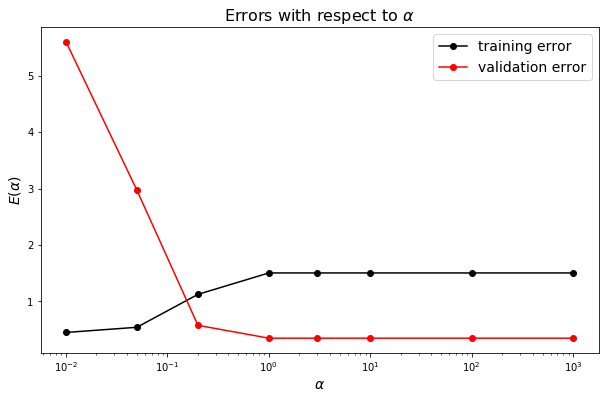

In [19]:
# Plot the training and validation errors
plt.figure(figsize=(10,6))    # Set figure size
plt.plot(alpha_values, err_train, marker='o', color='black', label='training error')    # Plot training errors
plt.plot(alpha_values, err_val, marker='o', color='red', label='validation error')    # Plot validation errors
plt.xscale('log')    # Set x-axis to logarithmic scale
plt.xlabel(r'$\alpha$')    # Set label of x-axis
plt.ylabel(r'$E(\alpha)$')    # Set label of y-axis
plt.title(r'Errors with respect to $\alpha$', fontsize=16)    # Set title
plt.legend()    # Show legend
plt.show()

## Take Home Quiz

Answer the following questions by setting, for each question, the variable `answer_R4_Q??` to the index of the correct answer. E.g. if you think that the second answer in the first quiz question is the right one, then set `answer_R4_Q1=2`. 

<a id='QuestionR4_1'></a>
<div class=" alert alert-warning">
<p><b>Student Task.</b> Question R4.1. </p>

<p>What is the goal of model selection in machine learning?</p>

<ol>
  <li> To choose (learn) the optimal predictor function $h_{\rm opt}$ out of a given hypothesis space (model) $\mathcal{H}$.</li>
  <li> To select the most suitable car model using machine learning methods.</li>
  <li> To select the optimal weights used for regularization.</li>
  <li> To select the best hypothesis space out of a set of candidates $\lbrace \mathcal{H}^{(1)}, \mathcal{H}^{(2)}, \ldots,\mathcal{H}^{(n)} \rbrace$.</li>
</ol> 

</div>

In [ ]:
# answer_R4_Q1  = ...
### BEGIN SOLUTION
answer_R4_Q1 = 4
### END SOLUTION

In [ ]:
# this cell is for tests
assert answer_R4_Q1 in [1,2,3,4], '"answer_R4_Q1" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')

### BEGIN HIDDEN TESTS
assert answer_R4_Q1 in [1,2,3,4], '"answer_R4_Q1" Value should be an integer between 1 and 4.'
assert answer_R4_Q1 == 4, ' "answer_R4_Q1" Correct answer is 4.'
### END HIDDEN TESTS

<a id='QuestionR4_2'></a>
<div class=" alert alert-warning">
<p><b>Student Task.</b> Question R4.2. </p>

<p>What is a good measure for the prediction error (loss) incurred by a predictor function $h(\mathbf{x})$ on new data points?</p>
<ol>
  <li> The empirical error (average loss) of $h(\mathbf{x})$ on the <b>training set</b> which is also used to tune $h(\mathbf{x})$. </li>
  <li> The empirical error (average loss) of $h(\mathbf{x})$ on some <b>validation set</b> which is different from the training set. 
</ol> 

</div>

In [ ]:
# answer_R4_Q2  = ...
### BEGIN SOLUTION
answer_R4_Q2 = 2
### END SOLUTION

In [ ]:
# this cell is for tests
assert answer_R4_Q2 in [1,2], '"answer_R4_Q2" Value should be an integer between 1 and 2.'
print('Sanity check tests passed!')

### BEGIN HIDDEN TESTS
assert answer_R4_Q2 in [1,2], '"answer_R4_Q2" Value should be an integer between 1 and 2.'
assert answer_R4_Q2 == 2, ' "answer_R4_Q2" Correct answer is 2.'
### END HIDDEN TESTS

<a id='QuestionR4_3'></a>
<div class=" alert alert-warning">
<p><b>Student Task.</b> Question R4.3. </p>

Regularized linear regression amounts to finding the predictor $h(\mathbf{x})$ which minimizes the regularized training error 
\begin{equation} 
(1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)}) \big)^{2} + \alpha \mathcal{R}(h).
\end{equation}
Which statement is true?

<ol>
  <li> Using a large value for the regularization parameter $\alpha$ prefers predictors with large complexity $\mathcal{R}(h)$ but small training error.</li>
  <li>  Using a small value for the regularization parameter $\alpha$ prefers predictors with large complexity $\mathcal{R}(h)$ but small training error.</li>
  <li> For regularization parameter $\alpha=0$, the optimal predictor is always $h(\mathbf{x}) =0$. </li>
  <li> For regularization parameter $\alpha=0$, the optimal predictor is always $h(\mathbf{x}) =42$.</li>
</ol> 

</div>

In [ ]:
# answer_R4_Q3  = ...
### BEGIN SOLUTION
answer_R4_Q3 = 2
### END SOLUTION

In [ ]:
# this cell is for tests
assert answer_R4_Q3 in [1,2,3,4], '"answer_R4_Q3" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')

### BEGIN HIDDEN TESTS
assert answer_R4_Q3 in [1,2,3,4], '"answer_R4_Q3" Value should be an integer between 1 and 4.'
assert answer_R4_Q3 == 2, ' "answer_R4_Q3" Correct answer is 2.'
### END HIDDEN TESTS

<a id='QuestionR4_4'></a>
<div class=" alert alert-warning">
<p><b>Student Task.</b> Question R4.4. </p>

Use the previously implemented code in "Tuning Lasso Parameter" to find the optimal predictor (lowest validation error) for $\alpha=$ `alpha_val`. Using the same dataset.
When initializing Lasso, please use `fit_intercept=True`. 
<p>Which alpha should be chosen to achieve an optimal predictor?</p> 
<p>Possible alpha values are given in the code cell below.</p>
</div>

In [ ]:
alpha_values = np.array([0.01, 0.05, 0.2, 1, 3, 10, 1e2, 1e3])

# answer_R4_Q4  = ...
### BEGIN SOLUTION
answer_R4_Q4 = 3
### END SOLUTION

In [ ]:
# this cell is for tests
assert answer_R4_Q4 in [0.01, 0.05, 0.2, 1, 3, 10, 1e2, 1e3], 'answer_R4_Q3" Value should be a value out of given alpha values..'
print('Sanity check tests passed!')

### BEGIN HIDDEN TESTS
assert answer_R4_Q4 in [0.01, 0.05, 0.2, 1, 3, 10, 1e2, 1e3], 'answer_R4_Q4" Value should be an integer between 1 and 4.'
assert answer_R4_Q4 == 3, ' answer_R4_Q4" Correct answer is 3.'
### END HIDDEN TESTS